In [1]:
#IMPORTING LIBRARIES
#Tools:
import pandas as pd
import numpy as np

#For data loading:
import os
import pickle

#For plotting:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

#Statistics:
import scipy.stats as stats
import scipy as sp
from statsmodels.stats import diagnostic
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

#Others:
import warnings

In [2]:
#Removing warnings
warnings.filterwarnings('ignore')

In [5]:
#DATASETS IMPORTATION:
df = pd.read_csv('data/opp-stops_state.csv')
counties =  pd.read_csv('2016_US_County_Level_Presidential_Results.csv')

##drop of the Nan values:
df = df.dropna()
counties = counties.dropna()

##drop of useless data:
df.drop(columns = ['city', 'geography'], inplace = True)

,state,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n
418,CT,Fairfield County,white,0.013487,0.065458,0.356108,0.223550,17189.760000,160113.120000
419,CT,Fairfield County,black,0.029384,0.073116,0.315113,0.171864,5080.320000,25650.720000
420,CT,Fairfield County,hispanic,0.020520,0.039236,0.257426,0.198470,4725.120000,21654.720000
421,CT,Hartford County,white,0.012005,0.065458,0.319820,0.238114,17752.800000,160113.120000
422,CT,Hartford County,black,0.036567,0.073116,0.303398,0.155822,5408.160000,25650.720000
...,...,...,...,...,...,...,...,...,...
3927,WI,Kenosha County,black,0.051806,0.032153,0.337143,0.168363,827.265306,11545.959184
3928,WI,Kenosha County,hispanic,0.034705,0.018971,0.279070,0.170613,606.857143,7220.326531
3996,WI,Rock County,white,0.024457,0.035205,0.373786,0.227040,4125.551020,165997.224490
3997,WI,Rock County,black,0.094879,0.032153,0.405858,0.119259,616.897959,11545.959184


In [6]:
#To sort the states between red and blue:
##Definition of array with the names of red and blue states

red_states = ['SC', 'TX']
blue_states  = ['IL', 'CT', 'RI', 'WA']

##Function that returns a string containing the color of the state, according to its name and thanks to the arrays defined above
def what_color (name, blue_, red_):
    """input: name of the state (string) and the arrays with the red and blue states
    output: the color of the state (string)"""
    if any(s == name for s in blue_):
        return 'blue'
    elif any(s == name for s in red_):
        return 'red'
    else:
        return 'none'

##Loop function on all the state of the givcen dataframe to find the color of each one of them
def sort_array_of_state(dataframe, blue_, red_):
    """input: the dataframe to sort, the arrays with the list of the blue and red states
    output: an array with the list of the colors of the states in the same order"""
    colors = []
    for state in dataframe['state']:
        colors.append(what_color(state, blue_, red_))
    return colors
    
##Application of the function on our dataframe of interest
df['party'] = sort_array_of_state(df, blue_states, red_states)

In [7]:
df['nb_search'] = df['search_rate']*df['stops_per_year']

In [8]:
tx = df.loc[df["state"] == "TX"]
counties['color'] = np.where(counties["per_dem"] > counties["per_gop"], "blue", "red")
counties = counties.loc[counties["state_abbr"] == "TX"]
tx = pd.merge(left=tx, right=counties, left_on='subgeography', right_on='county_name')
tx = tx.drop(['state','party','votes_dem','votes_gop','state_abbr','county_name','combined_fips','Unnamed: 0'],axis=1)

In [9]:
tx_white = tx.loc[tx["subject_race"]== 'white']
tx_white_b = tx_white.loc[tx_white['color'] == 'blue']
tx_white_r = tx_white.loc[tx_white['color'] == 'red']
tx_black = tx.loc[tx["subject_race"]== 'black']
tx_black_b = tx_black.loc[tx_black['color'] == 'blue']
tx_black_r = tx_black.loc[tx_black['color'] == 'red']
tx_hisp = tx.loc[tx["subject_race"]== 'hispanic']
tx_hisp_b = tx_hisp.loc[tx_hisp['color'] == 'blue']
tx_hisp_r = tx_hisp.loc[tx_hisp['color'] == 'red']

In [27]:
def plot_texas(ax,tx_race_color,color,rate,title):
    tx_white_c = tx_white.loc[tx_white['color'] == color]
    size = tx_white_c['nb_search'].values+tx_race_color['nb_search'].values
    ax.scatter(tx_white_c[rate]*100, tx_race_color[rate]*100,  s = size, facecolors='none', edgecolors=color)
    ax.plot([0,1],[0,1], linestyle = '--', linewidth = 1, color='black',transform=ax.transAxes)
    div = make_axes_locatable(ax)
    ax = div.append_axes("top", size="10%", pad=0)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_facecolor('gainsboro')
    at = AnchoredText(title, loc=10, prop=dict(backgroundcolor='gainsboro', size=10, color='black'))
    ax.add_artist(at)

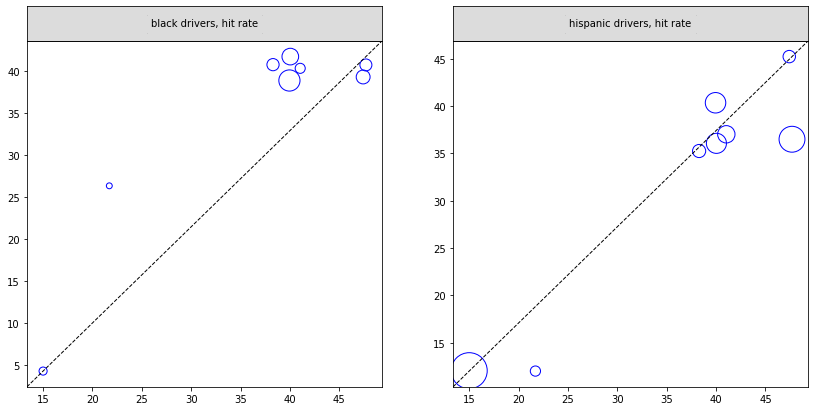

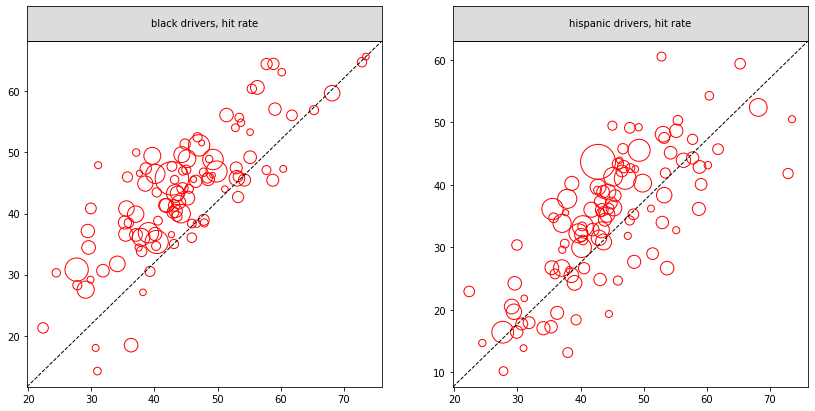

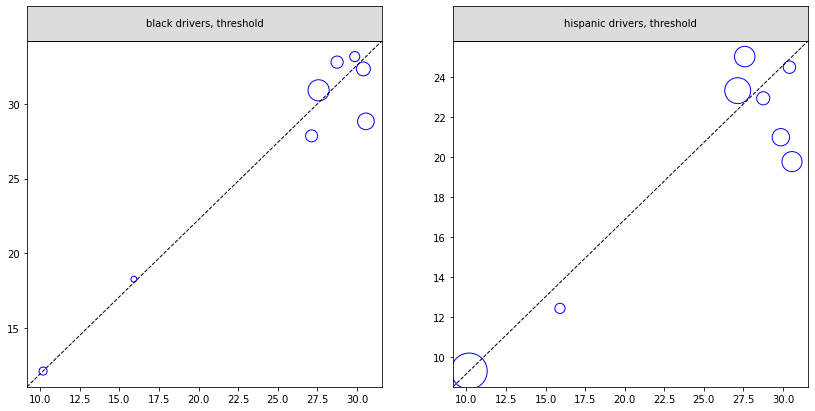

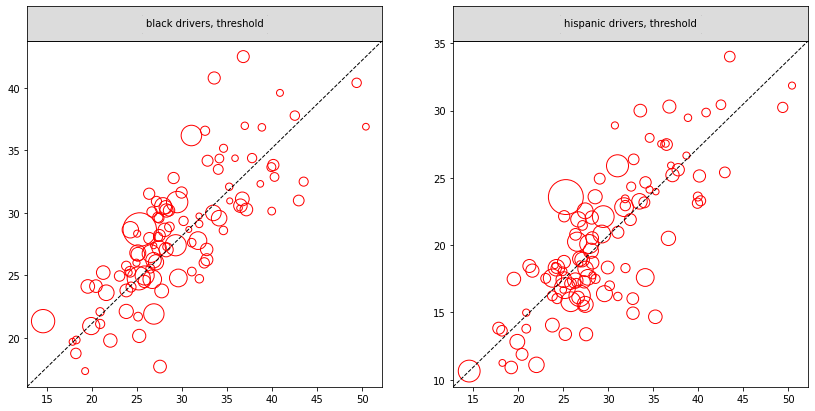

In [32]:
fig, ax = plt.subplots(1,2,figsize=(14,7))
plot_texas(ax[0],tx_black_b,'blue','hit_rate',"black drivers, hit rate")
plot_texas(ax[1],tx_hisp_b,'blue','hit_rate',"hispanic drivers, hit rate")

fig, ax = plt.subplots(1,2,figsize=(14,7))
plot_texas(ax[0],tx_black_r,'red','hit_rate',"black drivers, hit rate")
plot_texas(ax[1],tx_hisp_r,'red','hit_rate',"hispanic drivers, hit rate")

fig, ax = plt.subplots(1,2,figsize=(14,7))
plot_texas(ax[0],tx_black_b,'blue','inferred_threshold',"black drivers, threshold")
plot_texas(ax[1],tx_hisp_b,'blue','inferred_threshold',"hispanic drivers, threshold")

fig, ax = plt.subplots(1,2,figsize=(14,7))
plot_texas(ax[0],tx_black_r,'red','inferred_threshold',"black drivers, threshold")
plot_texas(ax[1],tx_hisp_r,'red','inferred_threshold',"hispanic drivers, threshold")